## 1. IMPORTAMOS PAQUETES Y DATOS

In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
%config IPCompleter.greedy = True
import warnings
warnings.filterwarnings('ignore')

Ruta archivo de calidad de datos

In [259]:
ruta_principal = 'C:/Users/Oscar/OneDrive - FM4/Escritorio/EVOLVE/Data Science/EVOLVE/Fernando_Costa/Practicas/Mini_Proyecto_EDA/'
carpeta = '002_archivos/'

Nombres de los ficheros de datos.

In [260]:
df = 'trabajo_resultado_eda.pickle'
cat = 'cat_resultado_eda.pickle'
num = 'num_resultado_eda.pickle'

Cargamos los datasets

In [261]:
df = pd.read_pickle(ruta_principal + carpeta + df)
cat = pd.read_pickle(ruta_principal + carpeta + cat)
num = pd.read_pickle(ruta_principal + carpeta + num)

## 3. EDA CATEGÓRICAS

### 3.1. Análisis estadístico

In [262]:
list(cat.columns)

['date_rptd',
 'date_occ',
 'area',
 'area_name',
 'rpt_dist_no',
 'part_1_2',
 'crm_cd',
 'crm_cd_desc',
 'mocodes',
 'vict_sex',
 'vict_descent',
 'premis_cd',
 'premis_desc',
 'weapon_used_cd',
 'weapon_desc',
 'status',
 'status_desc',
 'crm_cd_1',
 'crm_cd_2',
 'crm_cd_3',
 'crm_cd_4',
 'lat',
 'lon',
 'year_rptd',
 'month_rptd',
 'day_rptd',
 'year_occ',
 'month_occ',
 'day_occ',
 'hour_occ']

In [263]:
incluir_cat = cat.columns.to_list()

#Eliminamos las columnas que estén en la siguiente lista
for i in sorted([0, 1, 2, 4, 6, 8, 13, 15, 21, 22], reverse=True):
    del incluir_cat[i]

In [264]:
def frecuencias_cat(cat):
    # Asegúrate de que todas las columnas son de tipo 'str' para evitar problemas de comparación
    cat = cat[incluir_cat]
    
    resultado = cat.apply(lambda x: x.value_counts(normalize = True))\
                .T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return resultado

In [265]:
cat[incluir_cat].info()

<class 'pandas.core.frame.DataFrame'>
Index: 331263 entries, 200114944 to 240710787
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   area_name     331263 non-null  object  
 1   part_1_2      331263 non-null  category
 2   crm_cd_desc   331263 non-null  object  
 3   vict_sex      331263 non-null  object  
 4   vict_descent  283691 non-null  object  
 5   premis_cd     331263 non-null  object  
 6   premis_desc   331056 non-null  object  
 7   weapon_desc   108028 non-null  object  
 8   status_desc   331263 non-null  object  
 9   crm_cd_1      331263 non-null  object  
 10  crm_cd_2      331263 non-null  object  
 11  crm_cd_3      331263 non-null  object  
 12  crm_cd_4      331263 non-null  object  
 13  year_rptd     331263 non-null  object  
 14  month_rptd    331263 non-null  object  
 15  day_rptd      331263 non-null  object  
 16  year_occ      331263 non-null  object  
 17  month_occ     331263 no

In [266]:
pd.set_option('display.max_rows', None)

frecuencias_cat(cat[incluir_cat])
#Aparecerá una lista de todas las variables con su frecuencia asociada

,Variable,Valor,Frecuencia
3,area_name,Foothill,0.032823
5,area_name,Hollenbeck,0.036696
7,area_name,Mission,0.040267
16,area_name,Topanga,0.040771
4,area_name,Harbor,0.041185
2,area_name,Devonshire,0.041674
19,area_name,West Valley,0.041882
17,area_name,Van Nuys,0.042558
10,area_name,Northeast,0.043259
18,area_name,West LA,0.045616


### 3.2. Análisis gráfico

In [267]:
def graficos_eda_categoricos(cat):
  
    # Filtrar solo columnas numéricas seleccionadas en incluir_num
    cat = cat[incluir_cat]

    # Verificar si hay columnas numéricas
    if cat.shape[1] == 0:
        print("No hay columnas categóricas para graficar.")
        return    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

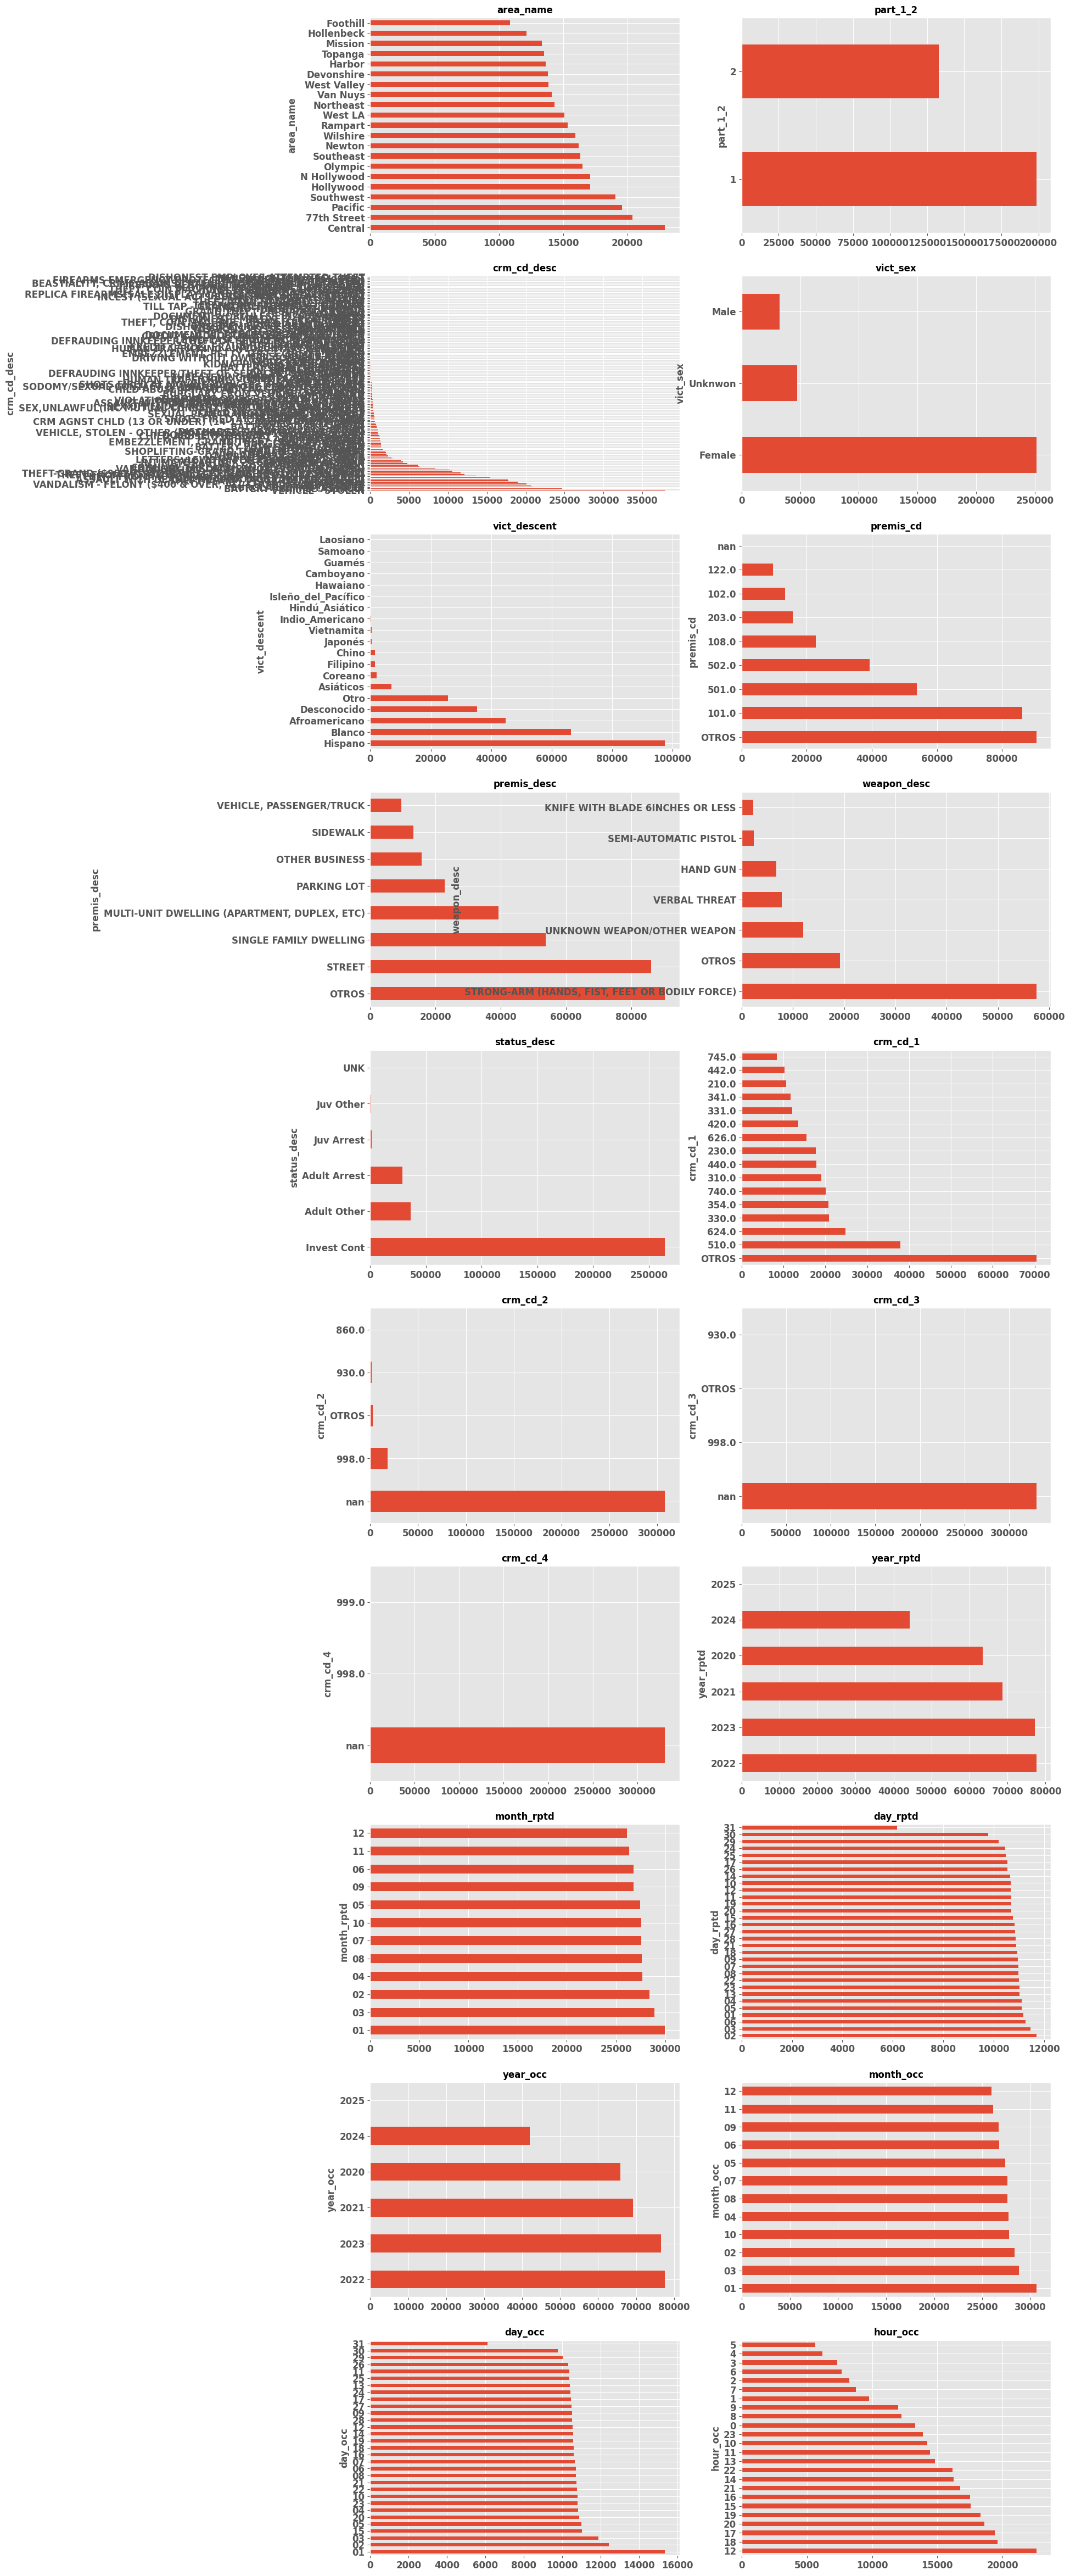

In [268]:
graficos_eda_categoricos(cat)

In [269]:
x, y = np.unique(x1, return_counts=True)
print(x)
print(y)

#Hacemos el gráfico
f, ax = plt.subplots(figsize = (10,4))

ax.bar(x,y, 
       color = 'darkseagreen',
       alpha = 0.5,
       edgecolor = 'red',
       width = [0.5, 0.3, 1.2, 0.3]);

NameError: name 'x1' is not defined

## 4. EDA NUMÉRICAS

### 4.1. Análisis estadístico

In [ ]:
list(num.columns)

['time_to_report', 'vict_age']

In [ ]:
incluir_num = num.columns.to_list()

#Eliminamos las columnas que estén en la siguiente lista
for i in sorted([], reverse=True):
    del incluir_num[i]

In [ ]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [ ]:
pd.set_option('display.max_rows', None)

estadisticos_cont(num[incluir_num])
#Aparecerá una lista de todas las variables con su frecuencia asociada

,count,mean,median,std,min,25%,50%,75%,max
time_to_report,331246.0,12.209503,1.0,69.167638,0.0,0.0,1.0,2.0,1862.0
vict_age,331246.0,28.929895,30.0,21.983521,0.0,0.0,30.0,44.0,100.0


In [ ]:
num[incluir_num].info()

<class 'pandas.core.frame.DataFrame'>
Index: 331246 entries, 201911050 to 240509218
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   time_to_report  331246 non-null  int64
 1   vict_age        331246 non-null  int64
dtypes: int64(2)
memory usage: 7.6 MB


### 4.2. Análisis gráfico

In [ ]:
def graficos_eda_continuas(num):
    
    # Filtrar solo columnas numéricas seleccionadas en incluir_num
    num = num[incluir_num]

    # Verificar si hay columnas numéricas
    if num.shape[1] == 0:
        print("No hay columnas numéricas para graficar.")
        return
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

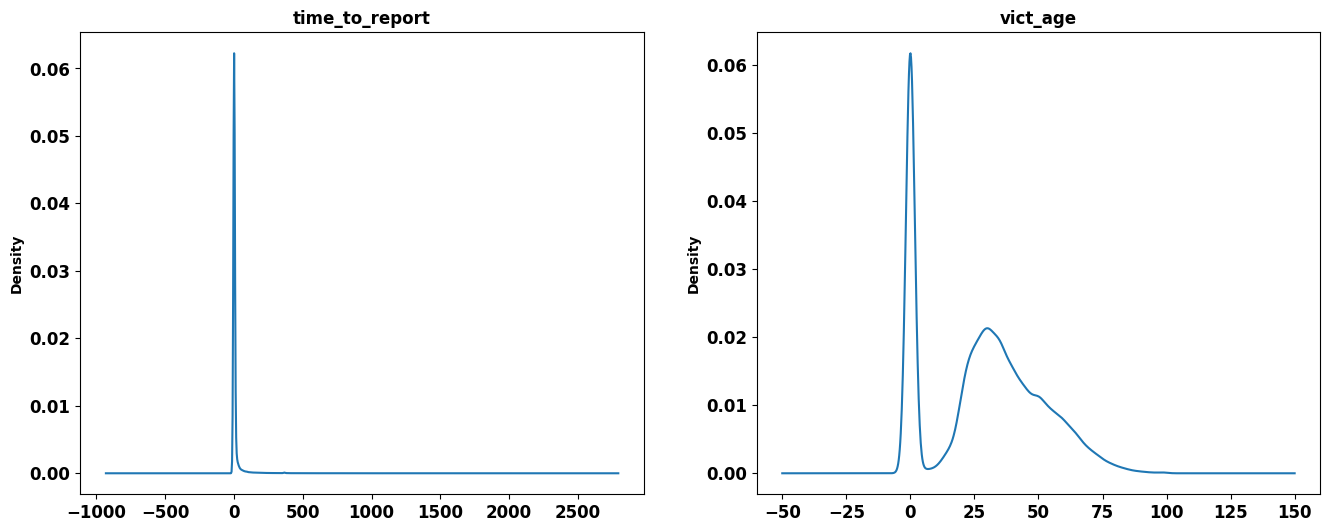

In [ ]:
graficos_eda_continuas(num)

## 5. VISUALIZACIONES ESPECÍFICAS

In [ ]:
resultado = (
    df[df.crm_cd_1 != "OTROS"]                    # Filtramos OTROS
      .groupby(["area_name", "crm_cd_1"])         # Agrupamos por zona y código
      .size()                                     # Contamos
      .reset_index(name="count")                  # Convertimos a columna
      .sort_values(["area_name", "count"], ascending=[True, False])
      .groupby("area_name")                       # Para cada área...
      .head(1)                                    # ...nos quedamos con el top1
      .reset_index(drop=True))

resultado


,area_name,crm_cd_1,count
0,77th Street,510.0,2914
1,Central,330.0,3161
2,Devonshire,510.0,1294
3,Foothill,510.0,1474
4,Harbor,510.0,2000
5,Hollenbeck,510.0,2074
6,Hollywood,624.0,1517
7,Mission,510.0,1993
8,N Hollywood,510.0,1676
9,Newton,510.0,2712


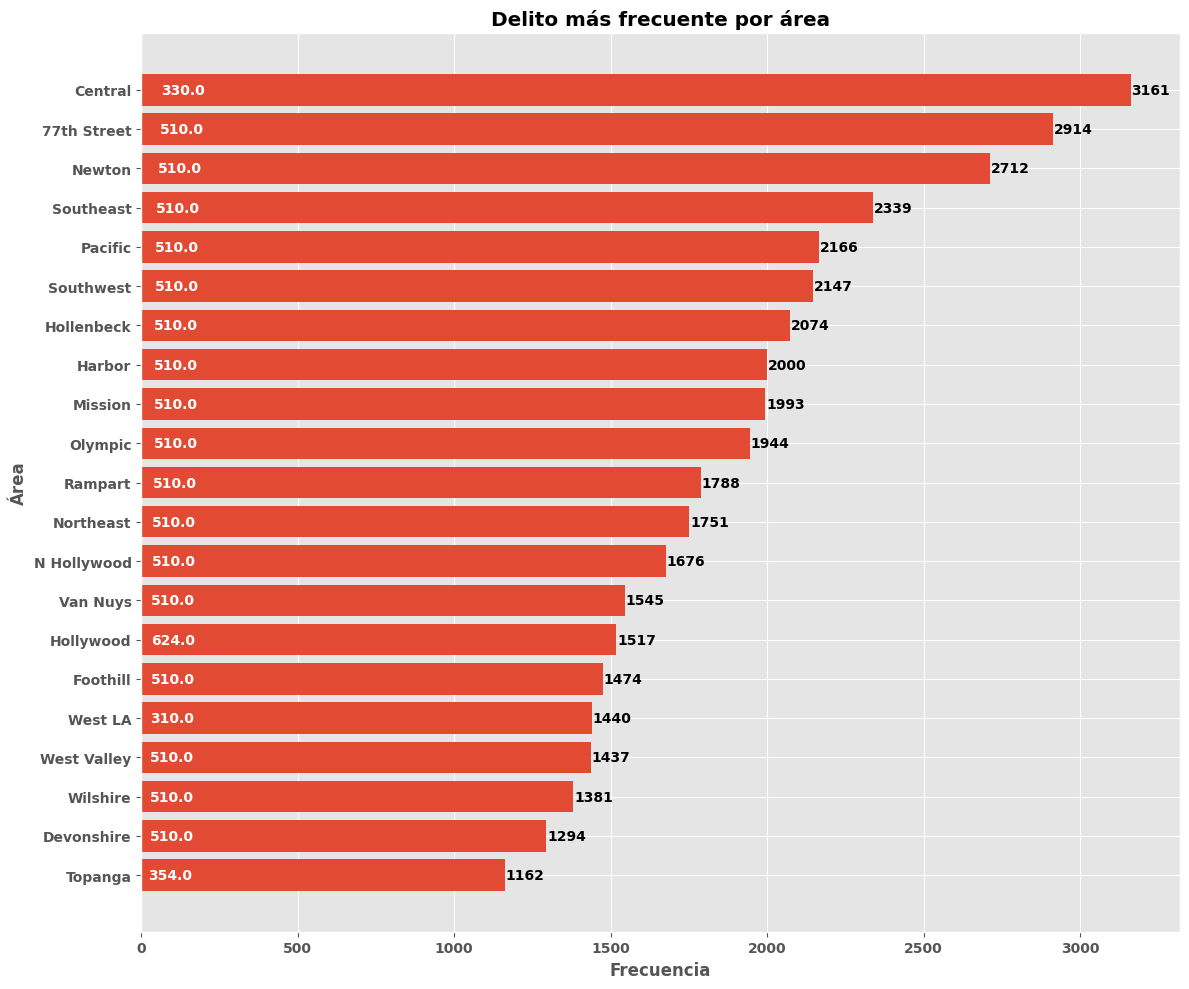

In [ ]:
import matplotlib.pyplot as plt

# Ordenamos de mayor a menor
resultado_sorted = resultado.sort_values("count", ascending=False)

plt.figure(figsize=(12, 10))
plt.style.use('ggplot')

bars = plt.barh(
    resultado_sorted["area_name"],
    resultado_sorted["count"],
)

plt.gca().invert_yaxis()  # Para que el mayor quede arriba

# Añadir etiquetas dentro de la barra (crm_cd_1)
for bar, texto in zip(bars, resultado_sorted["crm_cd_1"]):
    plt.text(
        bar.get_width() * 0.02,               # un poco a la derecha del borde
        bar.get_y() + bar.get_height() / 2,   # centrado vertical
        str(texto),
        va='center',
        ha='left',
        color="white",
        fontsize=10,
    )

# Añadir el count al final de la barra
for bar, valor in zip(bars, resultado_sorted["count"]):
    plt.text(
        bar.get_width() + 3,                   # fuera de la barra
        bar.get_y() + bar.get_height() / 2,
        str(valor),
        va='center',
        ha='left',
        fontsize=10
    )

plt.xlabel("Frecuencia")
plt.ylabel("Área")
plt.title("Delito más frecuente por área")
plt.tight_layout()
plt.show()


En el gráfico podemos observar que el delito mas frecuente que se comete y la zona. Esto ayudaría a destinar recursos específicos

NOTA: En un análisis mas profundo, se podría segmentar por horas, edad, procedencia de la víctima por zona y horario por ejemplo

In [ ]:
tabla = df.groupby(["year_rptd", "part_1_2"]).size().unstack(fill_value=0)
tabla.columns = ['Leve', 'Grave']
tabla

,Leve,Grave
year_rptd,,
2020,37357,26157
2021,40343,28285
2022,44886,32788
2023,46105,31063
2024,29675,14527
2025,30,30


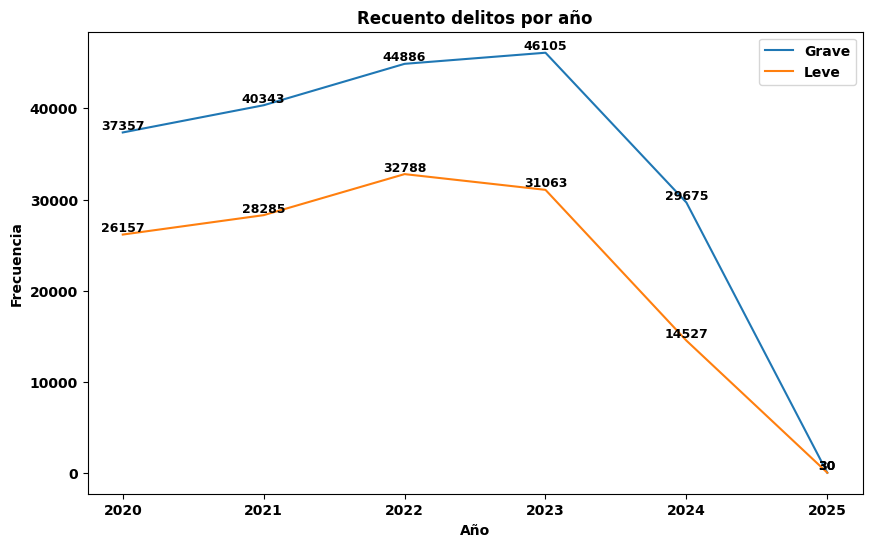

In [ ]:
ax = tabla.plot.line(figsize=(10, 6))

ax.set_xlabel("Año")
ax.set_ylabel("Frecuencia")
ax.set_title("Recuento delitos por año")

# Cambiar la leyenda
ax.legend(["Grave", "Leve"])

# Poner la frecuencia sobre cada punto
for line in ax.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, str(int(y)), fontsize=9, ha='center', va='bottom')

plt.show()


En el gráfico podemos observar el recuento de los tipos de delitos cometidos por año donde vemos que graves y leves siguen el mismo patrón descendente